In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importation et mise en forme du Fichier INSEE
Nous allons utiliser ce fichier pour correspondre les données additionnelles par commune et leur code postal correspond afin de les combiner avec les données initiales de l'institut Louis Bachelier



In [ ]:
insee = pd.read_csv("/content/drive/MyDrive/PROJET_STAT_price_prediction/correspondance-code-insee-code-postal.csv", sep=';')
insee.head()
insee = insee[['Code INSEE','Code Postal']]
insee = insee.rename(columns={'Code INSEE': 'INSEE_COM'})

insee['INSEE_COM']=insee['INSEE_COM'].astype(str)

# On fait quelques ajustements pour nettoyer/mettre sous le bon format le fichier
modif = insee[insee['Code Postal'].str.len() > 6]
modif['Code Postal'] = modif['Code Postal'].str.split('/')
modif = modif.explode('Code Postal')
insee = insee[insee['Code Postal'].str.len() <= 6]
insee = pd.concat([insee, modif])
insee

<ipython-input-75-5ff027528473>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oh['Code Postal'] = oh['Code Postal'].str.split('/')


,INSEE_COM,Code Postal
0,66033,66300
1,64254,64370
2,47260,47270
3,80118,80150
4,46147,46220
...,...,...
32774,42218,42230
35346,50129,50100
35346,50129,50130
36298,92048,92190


## Ajout du Prix au M2 par commune (données 2020)

In [ ]:
prix2020 = pd.read_csv("/content/drive/MyDrive/PROJET_STAT_price_prediction/dvf2020.csv")
prix2020 = prix2020[['INSEE_COM','Prixm2Moyen']]
prix2020 = prix2020.rename(columns={'Prixm2Moyen': 'Prixm2Moyen_2020'})
prix2020['INSEE_COM']=prix2020['INSEE_COM'].astype(str)
#en utilisant le fichier INSEE
prix = prix2020.merge(insee, on='INSEE_COM', how='left')
prix.drop('INSEE_COM', axis=1, inplace=True)
prix = prix.drop_duplicates(subset=['Code Postal'])
#on va garder que les valeurs numeriques
prix = prix[prix['Code Postal'].astype(str).str.isnumeric()]
prix['Code Postal'] = prix['Code Postal'].astype('int64')
prix

,Prixm2Moyen_2020,Code Postal
0,1693.166667,1400
1,2023.000000,1640
2,2018.125000,1500
3,2680.760000,1330
4,2327.000000,1300
...,...,...
30515,2380.743243,95200
30518,3961.921739,95230
30520,3363.602180,95150
30526,3491.000000,95760


## Ajout du Prix au M2 par commune (données 2019)

In [ ]:
prix2019 = pd.read_csv("/content/drive/MyDrive/PROJET_STAT_price_prediction/dvf2019.csv")
prix2019 = prix2019[['INSEE_COM','Prixm2Moyen']]
prix2019 = prix2019.rename(columns={'Prixm2Moyen': 'Prixm2Moyen_2019'})
prix2019['INSEE_COM'] = prix2019['INSEE_COM'].astype(str)
#en utilisant le fichier INSEE
prix2 = prix2019.merge(insee, on='INSEE_COM', how='left')
prix2.drop('INSEE_COM', axis=1, inplace=True)
prix2 = prix2.drop_duplicates(subset=['Code Postal'])
#on va garder que les valeurs numeriques
prix2 = prix2[prix2['Code Postal'].astype(str).str.isnumeric()]
prix2['Code Postal'] = prix2['Code Postal'].astype('int64')
prix2

,Prixm2Moyen_2019,Code Postal
0,2001.263158,1400
1,1130.250000,1640
2,2043.314010,1500
3,2419.742857,1330
4,1155.000000,1300
...,...,...
30275,2437.986971,95200
30278,3710.869919,95230
30280,3280.834081,95150
30285,3114.206897,95760


## Ajout Revenu Moyen par commune

In [ ]:
revenu = pd.read_csv('/content/drive/MyDrive/PROJET_STAT_price_prediction/cc_filosofi_2021_COM.csv',sep=';')
revenu = revenu[['CODGEO','MED21']]
revenu = revenu.rename(columns={'CODGEO': 'INSEE_COM', 'MED21' : 'Niveau de vie'})

revenu['INSEE_COM']=revenu['INSEE_COM'].astype(str)
combine = revenu.merge(insee, on='INSEE_COM', how='left')
combine['Code Postal'].value_counts().head()
combine = combine.drop_duplicates(subset=['Code Postal'])
combine.drop('INSEE_COM', axis=1, inplace=True)

combine = combine[combine['Code Postal'].astype(str).str.isnumeric()]
combine = combine[combine['Niveau de vie'].astype(str).str.isnumeric()]
combine['Code Postal'] = combine['Code Postal'].astype('int64')
combine['Niveau de vie'] = combine['Niveau de vie'].astype('int64')
combine

<ipython-input-78-d2015719a651>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  revenu = pd.read_csv('/content/drive/MyDrive/PROJET_STAT_price_prediction/cc_filosofi_2021_COM.csv',sep=';')


,Niveau de vie,Code Postal
0,25820,1400
1,24480,1640
2,21660,1500
3,24610,1330
4,24210,1300
...,...,...
34983,17720,97441
34984,13280,97433
34985,16560,97430
34986,16680,97426


## Ajout du niveau d'Insécurité et délinquance (données 2021)

In [ ]:
insec = pd.read_csv('/content/drive/MyDrive/PROJET_STAT_price_prediction/insecurite-2021.csv',sep=';')
insec = insec[['CODGEO_2024','faits']]
insec = insec.rename(columns={'CODGEO_2024': 'INSEE_COM','faits': 'Nb_déliquance'})
insec['INSEE_COM'] = insec['INSEE_COM'].astype(str).str.zfill(5)
insec = insec.groupby('INSEE_COM').sum(numeric_only=True)
insec = insec.reset_index()

insec['INSEE_COM']=insec['INSEE_COM'].astype(str)
insec = insec.merge(insee, on='INSEE_COM', how='left',copy=False)
insec = insec.drop('INSEE_COM', axis=1)
insec['Code Postal'].value_counts().head()
insec = insec.drop_duplicates(subset=['Code Postal'])

insec = insec[insec['Code Postal'].astype(str).str.isnumeric()]
insec['Code Postal'] = insec['Code Postal'].astype('int64')
insec

<ipython-input-79-a07618573a6a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  insec= pd.read_csv('/content/drive/MyDrive/PROJET_STAT_price_prediction/insecurite-2021.csv',sep=';')


,Nb_déliquance,Code Postal
0,0.0,1400
1,0.0,1640
2,5434.0,1500
3,117.0,1330
4,0.0,1300
...,...,...
35050,4946.0,97610
35051,957.0,97625
35052,8020.0,97600
35058,2342.0,97640


## Importation des datasets fournis par l'Institut Louis Bachelier

In [ ]:
x = pd.read_csv("/content/drive/MyDrive/PROJET_STAT_price_prediction/X_train_J01Z4CN.csv")
y = pd.read_csv("/content/drive/MyDrive/PROJET_STAT_price_prediction/y_train_OXxrJt1.csv")
x = x.rename(columns={'postal_code': 'Code Postal'})
y.set_index('id_annonce', inplace=True)
print(x.shape)
print(y.shape)
x

(37368, 27)
(37368, 1)


,id_annonce,property_type,approximate_latitude,approximate_longitude,city,Code Postal,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,E,59.0,F,NaN,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,D,53.0,E,Sud,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ajout de la Distance aux plus grandes villes
Nous avons ajouté la distance à Paris, Marseille et Lyon mais aussi la distance minimale à l'une des grandes villes de France, pour avoir pour chaque bien la distance aux grosses métropoles.


In [ ]:
biggest_cities = {
    'Paris': (48.862725, 2.287592),
    'Marseille': (43.2961743, 5.3699525),
    'Lyon': (45.7578137, 4.8320114),
    'Toulouse': (43.6044622, 1.4442469),
    'Nice': (43.7009358, 7.2683912),
    'Nantes': (47.2186371 , -1.5541362 ),
    'Montpellier': (43.6112422, 3.8767337),
    'Strasbourg': (48.584614, 7.7507127),
    'Bordeaux': (44.841225, -0.5800364),
    'Lille': (50.6365654, 3.0635282)
}

#Calcul de distance
def distance(lat1, lon1, lat2, lon2):
  R = 6371
  lat1 = np.radians(lat1)
  lat2 = np.radians(lat2)
  dlat = lat2 - lat1

  lon1 = np.radians(lon1)
  lon2 = np.radians(lon2)
  dlon = lon2 - lon1

  a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
  c = 2 * np.arcsin(np.sqrt(a))
  return R * c

for city, (lat, lon) in biggest_cities.items():
    col_name = f'distance_to_{city.lower()}'
    x[col_name] = distance(x['approximate_latitude'], x['approximate_longitude'], lat, lon)

nom_colonne = [ 'distance_to_nice', 'distance_to_toulouse', 'distance_to_nantes', 'distance_to_montpellier', 'distance_to_strasbourg', 'distance_to_bordeaux', 'distance_to_lille']

x['distance_minimale'] = x[nom_colonne].min(axis = 1)
x.drop(columns = nom_colonne, inplace = True)

## Association des variables additionnelles au dataset initial
Il faut utiliser la fonction merge pour combiner toutes les informations pour chaque bien dans un seul dataframe


In [ ]:
x_bis = x.merge(prix, on='Code Postal', how='left', copy=False)
x_bis = x_bis.merge(prix2, on='Code Postal', how='left', copy=False)
x_bis = x_bis.merge(combine, on='Code Postal', how='left',copy=False)
x_bis = x_bis.merge(insec, on='Code Postal', how='left',copy=False).set_index('id_annonce')
x_bis.drop('city', axis=1, inplace=True)
print(x_bis.shape)

(37368, 33)


In [ ]:
x_bis

,property_type,approximate_latitude,approximate_longitude,Code Postal,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,distance_to_paris,distance_to_marseille,distance_to_lyon,distance_minimale,Prixm2Moyen_2020,Prixm2Moyen_2019,Niveau de vie,Nb_déliquance
id_annonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,688.622061,146.199545,296.405585,13.716662,5152.706827,5208.059590,26260.0,7477.0
35811033,appartement,45.695757,4.895610,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,403.323221,269.459287,8.484510,245.393337,2614.275046,2335.340792,17140.0,41570.0
35731841,maison,47.966791,-1.220451,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.379330,729.086831,521.408723,86.872550,756.500000,1119.000000,21640.0,0.0
35886765,maison,47.289292,-1.878805,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355.489811,719.668155,540.728050,25.732510,2299.897436,2128.547170,24590.0,316.0
35781137,appartement,45.718992,4.844234,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,399.165259,272.609748,4.419720,246.539376,NaN,NaN,24410.0,83248.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,appartement,43.480292,-1.484324,64100,2995.0,NaN,NaN,255.0,E,59.0,F,NaN,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.042294,554.095798,560.182639,167.639162,3453.650155,3248.198502,21780.0,28991.0
35890109,appartement,48.861391,2.401158,75020,36.0,4.0,NaN,229.0,D,53.0,E,Sud,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.308956,659.695910,390.697090,203.043806,NaN,NaN,23570.0,94723.0
36010245,appartement,44.397837,-1.164312,40600,99.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,561.956702,537.967535,494.374375,67.595563,3330.872979,3285.002174,24110.0,5539.0


## Corrélation des données

Prixm2Moyen_2020            0.485473
Prixm2Moyen_2019            0.482066
Niveau de vie               0.399341
nb_rooms                    0.311138
nb_bedrooms                 0.298589
nb_bathrooms                0.215127
nb_photos                   0.211963
Nb_déliquance               0.155473
has_a_cellar                0.141069
nb_terraces                 0.129738
Code Postal                 0.122125
approximate_longitude       0.095404
floor                       0.094616
nb_parking_places           0.064793
has_a_balcony               0.062426
has_air_conditioning        0.056811
land_size                   0.054638
last_floor                  0.048400
has_a_garage                0.040821
approximate_latitude        0.034801
size                        0.034289
nb_boxes                    0.030988
distance_minimale           0.020126
distance_to_lyon            0.003514
distance_to_marseille      -0.004904
upper_floors               -0.005540
ghg_value                  -0.018626
e

<ipython-input-85-c74385ec1390>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cor_target.values, y=cor_target.index, palette="coolwarm")


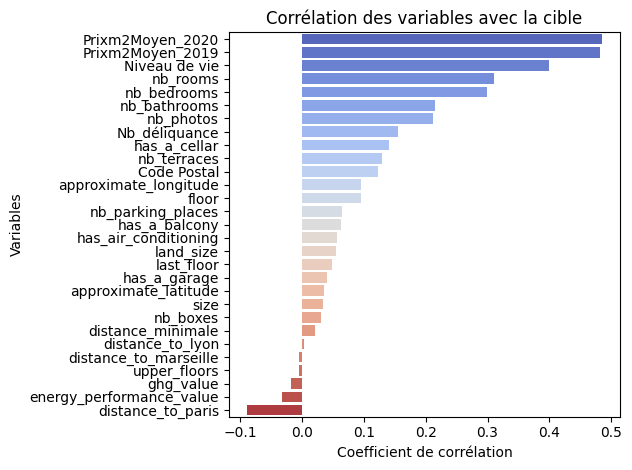

In [ ]:
df_corr = x_bis.copy()
df_corr["target"] = y  # ajouter temporairement la cible

# Calcul de la matrice de corrélation
correlation_matrix = df_corr.corr(numeric_only=True)

# Corrélation avec le target
cor_target = correlation_matrix["target"].drop("target").sort_values(ascending=False)

print(cor_target)

# Affichage de la heatmap de corrélation
sns.barplot(x=cor_target.values, y=cor_target.index, palette="coolwarm")
plt.title("Corrélation des variables avec la cible")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


## Traitement des données avec OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 1. Séparation des variables numériques et catégorielles
num_features = x_bis.select_dtypes(include=['float64', 'int64']).columns
cat_features = x_bis.select_dtypes(include=['object', 'category']).columns

# 2. Imputation des valeurs manquantes
# Pour les variables numériques : médiane
medians = x_bis[num_features].median()
x_bis[num_features] = x_bis[num_features].fillna(medians)

# 3. Encodage One-Hot
encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')  # output dense array

# Fit + transform des données catégorielles
encoded_cat = encoder.fit_transform(x_bis[cat_features])

# Création d’un DataFrame avec les bons noms de colonnes
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features), index=x_bis.index)

# 4. On concatène les données numériques et les données encodées
x_bis_encoded = pd.concat([x_bis[num_features], encoded_cat_df], axis=1)

In [ ]:
cat_features

Index(['property_type', 'energy_performance_category', 'ghg_category',
       'exposition'],
      dtype='object')

In [ ]:
num_features

Index(['approximate_latitude', 'approximate_longitude', 'Code Postal', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places',
       'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors',
       'distance_to_paris', 'distance_to_marseille', 'distance_to_lyon',
       'distance_minimale', 'Prixm2Moyen_2020', 'Prixm2Moyen_2019',
       'Niveau de vie', 'Nb_déliquance'],
      dtype='object')

In [ ]:
x_bis_encoded.columns

Index(['approximate_latitude', 'approximate_longitude', 'Code Postal', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places',
       'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors',
       'distance_to_paris', 'distance_to_marseille', 'distance_to_lyon',
       'distance_minimale', 'Prixm2Moyen_2020', 'Prixm2Moyen_2019',
       'Niveau de vie', 'Nb_déliquance', 'property_type_atelier',
       'property_type_chalet', 'property_type_chambre',
       'property_type_château', 'property_type_divers', 'property_type_duplex',
       'property_type_ferme', 'property_type_gîte', 'property_type_hôtel',
       'property_type_hôtel particulier', 'property_type_loft',
       'property_type_maison', 'property_type_manoir', 'property_type_moulin',
       'property_type_parking', 'property_type_propriété',
   

In [ ]:
pd.set_option('display.width',None)
pd.set_option('display.max_columns',None)

In [ ]:
x_bis_encoded

,approximate_latitude,approximate_longitude,Code Postal,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,distance_to_paris,distance_to_marseille,distance_to_lyon,distance_minimale,Prixm2Moyen_2020,Prixm2Moyen_2019,Niveau de vie,Nb_déliquance,property_type_atelier,property_type_chalet,property_type_chambre,property_type_château,property_type_divers,property_type_duplex,property_type_ferme,property_type_gîte,property_type_hôtel,property_type_hôtel particulier,property_type_loft,property_type_maison,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa,energy_performance_category_B,energy_performance_category_C,energy_performance_category_D,energy_performance_category_E,energy_performance_category_F,energy_performance_category_G,energy_performance_category_nan,ghg_category_B,ghg_category_C,ghg_category_D,ghg_category_E,ghg_category_F,ghg_category_G,ghg_category_nan,exposition_Est-Ouest,exposition_Nord,exposition_Nord-Est,exposition_Nord-Ouest,exposition_Nord-Sud,exposition_Ouest,exposition_Ouest-Est,exposition_Sud,exposition_Sud-Est,exposition_Sud-Nord,exposition_Sud-Ouest,exposition_nan
id_annonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35996577,43.643880,7.117183,6270,63.0,2.0,795.0,180.0,16.0,3.0,2.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,688.622061,146.199545,296.405585,13.716662,5152.706827,5208.059590,26260.0,7477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35811033,45.695757,4.895610,69200,90.0,3.0,795.0,223.0,52.0,5.0,4.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,403.323221,269.459287,8.484510,245.393337,2614.275046,2335.340792,17140.0,41570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35731841,47.966791,-1.220451,35130,61.0,2.0,370.0,180.0,16.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.379330,729.086831,521.408723,86.872550,756.500000,1119.000000,21640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35886765,47.289292,-1.878805,44360,142.0,2.0,764.0,217.0,44.0,4.0,3.0,1.0,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355.489811,719.668155,540.728050,25.732510,2299.897436,2128.547170,24590.0,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35781137,45.718992,4.844234,69007,88.0,3.0,795.0,180.0,16.0,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,399.165259,272.609748,4.419720,246.539376,2458.156250,2302.479599,24410.0,83248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,43.480292,-1.484324,64100,2995.0,2.0,795.0,255.0,59.0,1.0,3.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.042294,554.095798,560.182639,167.639162,3453.650155,3248.198502,21780.0,28991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Entraînement et Evaluation du modèle

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_bis_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Pour ne pas ralentir le notebook
"""from sklearn.model_selection import GridSearchCV

parametres= {
    'n_estimators': [100, 200],
    'max_depth': [7, 10, 15],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

grid_search = GridSearchCV(XGBRegressor(), scoring='neg_mean_absolute_error', param_grid=parametres, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)"""

"from sklearn.model_selection import GridSearchCV\n\nparametres= {\n    'n_estimators': [100, 200],\n    'max_depth': [7, 10, 15],\n    'learning_rate': [0.01, 0.1],\n    'subsample': [0.8, 1],\n    'colsample_bytree': [0.6, 0.8, 1]\n}\n\ngrid_search = GridSearchCV(XGBRegressor(), scoring='neg_mean_absolute_error', param_grid=parametres, cv=5, n_jobs=-1, verbose=2)\ngrid_search.fit(x_train, y_train)"

In [ ]:
grid_search.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
# Les meilleurs paramètres trouvés avec le GridSearch
best_params = {'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
m_1 = XGBRegressor(**best_params)
m_1.fit(x_train, y_train)
y_pred_m1 = m_1.predict(x_test)
mean_absolute_percentage_error(y_test, y_pred_m1)

0.29771023988723755

In [ ]:
#au lieu de regarder le MAPE sur un seul split, on fait une moyenne sur 5 splits
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

scores = cross_val_score(m_1, x_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=5)
print(-scores.mean())

0.30417115092277525


## Entraînement du modèle et prédiction finale

In [ ]:
x_final = pd.read_csv('/content/drive/MyDrive/PROJET_STAT_price_prediction/X_test_BEhvxAN.csv')
x_final

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,E,74.0,F,NaN,5.0,4.0,NaN,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,NaN,NaN,NaN,Sud,25.0,10.0,1.0,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,D,10.0,B,NaN,2.0,1.0,NaN,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,36052217,villa,43.117121,5.790808,sanary-sur-mer,83110,96.0,NaN,NaN,NaN,NaN,NaN,NaN,Sud,4.0,3.0,NaN,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9335,35823719,appartement,43.099598,5.874048,la-seyne-sur-mer,83500,71.0,3.0,NaN,51.0,B,11.0,C,Sud,3.0,2.0,1.0,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9336,35793053,appartement,45.977895,-1.096506,fouras,17450,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9337,36049283,maison,47.284067,-2.197979,saint-nazaire,44600,120.0,NaN,362.0,65.0,B,15.0,C,NaN,5.0,4.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# On rajoute les mêmes données utilisés dans le x_train
x_final = x_final.rename(columns={'postal_code': 'Code Postal'})
x_final = x_final.merge(prix, on='Code Postal', how='left', copy=False)
x_final = x_final.merge(prix2, on='Code Postal', how='left', copy=False)
x_final = x_final.merge(combine, on='Code Postal', how='left', copy=False)
x_final = x_final.merge(insec, on='Code Postal', how='left', copy=False).set_index('id_annonce')
x_final.drop('city', axis=1, inplace=True)
print(x_final.shape)
x_final

(9339, 29)


,property_type,approximate_latitude,approximate_longitude,Code Postal,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,Prixm2Moyen_2020,Prixm2Moyen_2019,Niveau de vie,Nb_déliquance
id_annonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35160615,maison,49.371670,3.533991,2220,143.0,NaN,800.0,299.0,E,74.0,F,NaN,5.0,4.0,NaN,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1179.500000,1000.000000,NaN,0.0
35830639,propriété,49.037190,-0.982385,50160,470.0,NaN,28559.0,NaN,NaN,NaN,NaN,Sud,25.0,10.0,1.0,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1493.000000,807.500000,19590.0,0.0
36016657,appartement,47.097180,6.149253,25290,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1416.500000,925.500000,NaN,0.0
35759225,appartement,43.699670,7.245556,6000,3637.0,3.0,NaN,210.0,D,10.0,B,NaN,2.0,1.0,NaN,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4293.183893,4110.026275,21570.0,196268.0
35252229,divers,43.849435,6.215461,4360,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2537.000000,3627.166667,20670.0,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36052217,villa,43.117121,5.790808,83110,96.0,NaN,NaN,NaN,NaN,NaN,NaN,Sud,4.0,3.0,NaN,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5355.318008,5072.929924,26150.0,7636.0
35823719,appartement,43.099598,5.874048,83500,71.0,3.0,NaN,51.0,B,11.0,C,Sud,3.0,2.0,1.0,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3175.088800,3007.102156,21400.0,26255.0
35793053,appartement,45.977895,-1.096506,17450,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3592.236994,3469.090226,25880.0,1363.0


In [ ]:
biggest_cities = {
    'Paris': (48.862725, 2.287592),
    'Marseille': (43.2961743, 5.3699525),
    'Lyon': (45.7578137, 4.8320114),
    'Toulouse': (43.6044622, 1.4442469),
    'Nice': (43.7009358, 7.2683912),
    'Nantes': (47.2186371 , -1.5541362 ),
    'Montpellier': (43.6112422, 3.8767337),
    'Strasbourg': (48.584614, 7.7507127),
    'Bordeaux': (44.841225, -0.5800364),
    'Lille': (50.6365654, 3.0635282)
}

#Calcul de distance
def distance(lat1, lon1, lat2, lon2):
  R = 6371
  lat1 = np.radians(lat1)
  lat2 = np.radians(lat2)
  dlat = lat2 - lat1

  lon1 = np.radians(lon1)
  lon2 = np.radians(lon2)
  dlon = lon2 - lon1

  a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
  c = 2 * np.arcsin(np.sqrt(a))
  return R * c

for city, (lat, lon) in biggest_cities.items():
    col_name = f'distance_to_{city.lower()}'
    x_final[col_name] = distance(x_final['approximate_latitude'], x_final['approximate_longitude'], lat, lon)

nom_colonne = ['distance_to_nice', 'distance_to_toulouse', 'distance_to_nantes', 'distance_to_montpellier', 'distance_to_strasbourg', 'distance_to_bordeaux', 'distance_to_lille']

x_final['distance_minimale'] = x_final[nom_colonne].min(axis = 1)
x_final.drop(columns = nom_colonne, inplace = True)

In [ ]:
x_final

,property_type,approximate_latitude,approximate_longitude,Code Postal,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,Prixm2Moyen_2020,Prixm2Moyen_2019,Niveau de vie,Nb_déliquance,distance_to_paris,distance_to_marseille,distance_to_lyon,distance_minimale
id_annonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35160615,maison,49.371670,3.533991,2220,143.0,NaN,800.0,299.0,E,74.0,F,NaN,5.0,4.0,NaN,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1179.500000,1000.000000,NaN,0.0,106.914583,690.054212,413.457978,144.612223
35830639,propriété,49.037190,-0.982385,50160,470.0,NaN,28559.0,NaN,NaN,NaN,NaN,Sud,25.0,10.0,1.0,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1493.000000,807.500000,19590.0,0.0,239.553748,803.645243,569.362433,206.616708
36016657,appartement,47.097180,6.149253,25290,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1416.500000,925.500000,NaN,0.0,348.011489,427.034289,179.918435,204.050965
35759225,appartement,43.699670,7.245556,6000,3637.0,3.0,NaN,210.0,D,10.0,B,NaN,2.0,1.0,NaN,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4293.183893,4110.026275,21570.0,196268.0,688.695338,157.796144,297.842057,1.841085
35252229,divers,43.849435,6.215461,4360,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2537.000000,3627.166667,20670.0,454.0,633.522925,91.783026,238.617638,86.136020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36052217,villa,43.117121,5.790808,83110,96.0,NaN,NaN,NaN,NaN,NaN,NaN,Sud,4.0,3.0,NaN,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5355.318008,5072.929924,26150.0,7636.0,693.649071,39.495242,303.331967,135.866935
35823719,appartement,43.099598,5.874048,83500,71.0,3.0,NaN,51.0,B,11.0,C,Sud,3.0,2.0,1.0,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3175.088800,3007.102156,21400.0,26255.0,697.978460,46.341055,306.935569,130.997833
35793053,appartement,45.977895,-1.096506,17450,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3592.236994,3469.090226,25880.0,1363.0,409.451748,591.926707,459.571206,132.665573


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 1. Séparation des variables numériques et catégorielles
num_features = x_final.select_dtypes(include=['float64', 'int64']).columns
cat_features = x_final.select_dtypes(include=['object', 'category']).columns

# 2. Imputation des valeurs manquantes
# Pour les variables numériques : médiane
x_final[num_features] = x_final[num_features].fillna(medians)

"""# Pour les variables catégorielles : "Unknown"
x_bis[cat_features] = x_bis[cat_features].fillna('Unknown')"""


# Fit + transform des données catégorielles
encoded_cat = encoder.fit_transform(x_final[cat_features])

# Création d’un DataFrame avec les bons noms de colonnes
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features), index=x_final.index)

# 4. On concatène les données numériques et les données encodées
x_final_encoded = pd.concat([x_final[num_features], encoded_cat_df], axis=1)

# Identify missing columns in x_final_encoded compared to x_bis_encoded
missing_cols_in_final = set(x_bis_encoded.columns) - set(x_final_encoded.columns)
for c in missing_cols_in_final:
    x_final_encoded[c] = 0

# Ensure columns are in the same order
x_final_encoded = x_final_encoded[x_bis_encoded.columns]


In [ ]:
x_final_encoded.columns

Index(['approximate_latitude', 'approximate_longitude', 'Code Postal', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places',
       'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors',
       'distance_to_paris', 'distance_to_marseille', 'distance_to_lyon',
       'distance_minimale', 'Prixm2Moyen_2020', 'Prixm2Moyen_2019',
       'Niveau de vie', 'Nb_déliquance', 'property_type_atelier',
       'property_type_chalet', 'property_type_chambre',
       'property_type_château', 'property_type_divers', 'property_type_duplex',
       'property_type_ferme', 'property_type_gîte', 'property_type_hôtel',
       'property_type_hôtel particulier', 'property_type_loft',
       'property_type_maison', 'property_type_manoir', 'property_type_moulin',
       'property_type_parking', 'property_type_propriété',
   

In [ ]:
x_bis_encoded['property_type_hôtel particulier']= np.zeros(len(x_bis_encoded))

In [ ]:
x_bis_encoded

,approximate_latitude,approximate_longitude,Code Postal,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,distance_to_paris,distance_to_marseille,distance_to_lyon,distance_minimale,Prixm2Moyen_2020,Prixm2Moyen_2019,Niveau de vie,Nb_déliquance,property_type_atelier,property_type_chalet,property_type_chambre,property_type_château,property_type_divers,property_type_duplex,property_type_ferme,property_type_gîte,property_type_hôtel,property_type_hôtel particulier,property_type_loft,property_type_maison,property_type_manoir,property_type_moulin,property_type_parking,property_type_propriété,property_type_péniche,property_type_terrain,property_type_terrain à bâtir,property_type_viager,property_type_villa,energy_performance_category_B,energy_performance_category_C,energy_performance_category_D,energy_performance_category_E,energy_performance_category_F,energy_performance_category_G,energy_performance_category_nan,ghg_category_B,ghg_category_C,ghg_category_D,ghg_category_E,ghg_category_F,ghg_category_G,ghg_category_nan,exposition_Est-Ouest,exposition_Nord,exposition_Nord-Est,exposition_Nord-Ouest,exposition_Nord-Sud,exposition_Ouest,exposition_Ouest-Est,exposition_Sud,exposition_Sud-Est,exposition_Sud-Nord,exposition_Sud-Ouest,exposition_nan
id_annonce,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35996577,43.643880,7.117183,6270,63.0,2.0,795.0,180.0,16.0,3.0,2.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,688.622061,146.199545,296.405585,13.716662,5152.706827,5208.059590,26260.0,7477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35811033,45.695757,4.895610,69200,90.0,3.0,795.0,223.0,52.0,5.0,4.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,403.323221,269.459287,8.484510,245.393337,2614.275046,2335.340792,17140.0,41570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35731841,47.966791,-1.220451,35130,61.0,2.0,370.0,180.0,16.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.379330,729.086831,521.408723,86.872550,756.500000,1119.000000,21640.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35886765,47.289292,-1.878805,44360,142.0,2.0,764.0,217.0,44.0,4.0,3.0,1.0,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355.489811,719.668155,540.728050,25.732510,2299.897436,2128.547170,24590.0,316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35781137,45.718992,4.844234,69007,88.0,3.0,795.0,180.0,16.0,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,399.165259,272.609748,4.419720,246.539376,2458.156250,2302.479599,24410.0,83248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,43.480292,-1.484324,64100,2995.0,2.0,795.0,255.0,59.0,1.0,3.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,665.042294,554.095798,560.182639,167.639162,3453.650155,3248.198502,21780.0,28991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
x_bis_encoded.columns

Index(['approximate_latitude', 'approximate_longitude', 'Code Postal', 'size',
       'floor', 'land_size', 'energy_performance_value', 'ghg_value',
       'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places',
       'nb_boxes', 'nb_photos', 'has_a_balcony', 'nb_terraces', 'has_a_cellar',
       'has_a_garage', 'has_air_conditioning', 'last_floor', 'upper_floors',
       'distance_to_paris', 'distance_to_marseille', 'distance_to_lyon',
       'distance_minimale', 'Prixm2Moyen_2020', 'Prixm2Moyen_2019',
       'Niveau de vie', 'Nb_déliquance', 'property_type_atelier',
       'property_type_chalet', 'property_type_chambre',
       'property_type_château', 'property_type_divers', 'property_type_duplex',
       'property_type_ferme', 'property_type_gîte', 'property_type_hôtel',
       'property_type_hôtel particulier', 'property_type_loft',
       'property_type_maison', 'property_type_manoir', 'property_type_moulin',
       'property_type_parking', 'property_type_propriété',
   

In [ ]:
y = pd.read_csv("/content/drive/MyDrive/PROJET_STAT_price_prediction/y_train_OXxrJt1.csv")
y.set_index('id_annonce', inplace=True)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
m_1 = XGBRegressor(**best_params)
m_1.fit(x_bis_encoded, y)
y_pred_m1 = m_1.predict(x_final_encoded)

In [ ]:
y_pred_m1 = pd.Series(y_pred_m1, index=x_final_encoded.index, name='prediction')
y_pred_m1

,prediction
id_annonce,
35160615,170001.718750
35830639,680420.937500
36016657,185358.937500
35759225,191014.546875
35252229,731660.812500
...,...
36052217,572970.500000
35823719,241400.531250
35793053,333802.312500


In [ ]:
y_pred_m1.to_csv('predictions-total_bis1.csv', index=True)